In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Tesla_data.csv")

In [3]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,6/29/10,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,6/30/10,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,7/1/10,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,7/2/10,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,7/6/10,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3637 non-null   int64  
 1   Date        3637 non-null   object 
 2   Open        3637 non-null   float64
 3   High        3637 non-null   float64
 4   Low         3637 non-null   float64
 5   Close       3637 non-null   float64
 6   Adj Close   3637 non-null   float64
 7   Volume      3637 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 227.4+ KB


In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3637 non-null   datetime64[ns]
 1   Open       3637 non-null   float64       
 2   High       3637 non-null   float64       
 3   Low        3637 non-null   float64       
 4   Close      3637 non-null   float64       
 5   Adj Close  3637 non-null   float64       
 6   Volume     3637 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 199.0 KB


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
print((df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] < 0).sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [12]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [13]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3637,3637.000000,3637.000000,3637.000000,3637.000000,3637.000000,3.637000e+03
mean,2017-09-17 12:05:20.703876864,80.080574,81.832710,78.219276,80.067952,80.067952,9.667330e+07
min,2010-06-29 00:00:00,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,2014-02-07 00:00:00,12.046667,12.320000,11.746667,12.065333,12.065333,4.868250e+07
50%,2017-09-18 00:00:00,17.833332,18.080000,17.563999,17.846666,17.846666,8.198100e+07
75%,2021-04-29 00:00:00,176.070007,179.770004,173.169998,176.880005,176.880005,1.223940e+08
max,2024-12-09 00:00:00,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08
std,NaN,105.466131,107.807170,102.931208,105.409448,105.409448,7.787314e+07


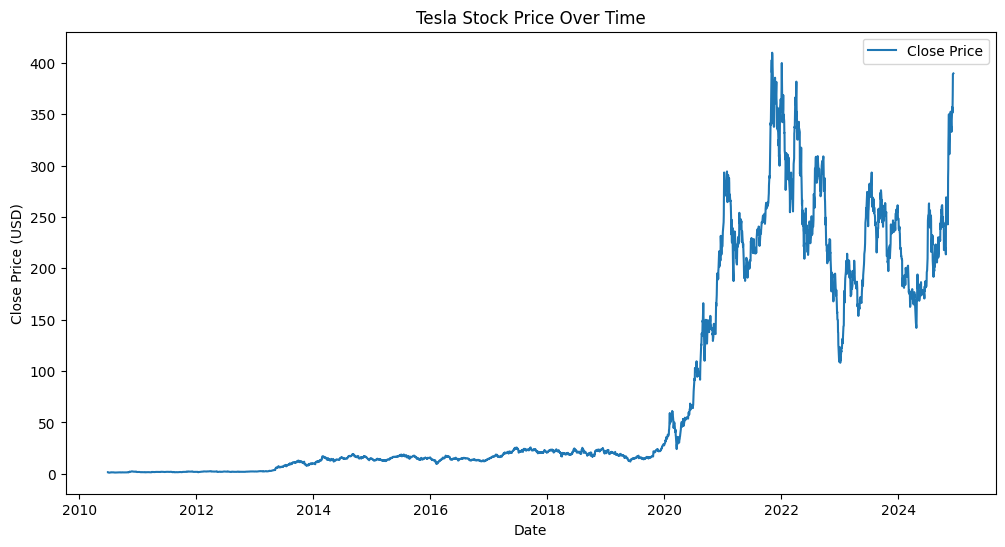

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label="Close Price")
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

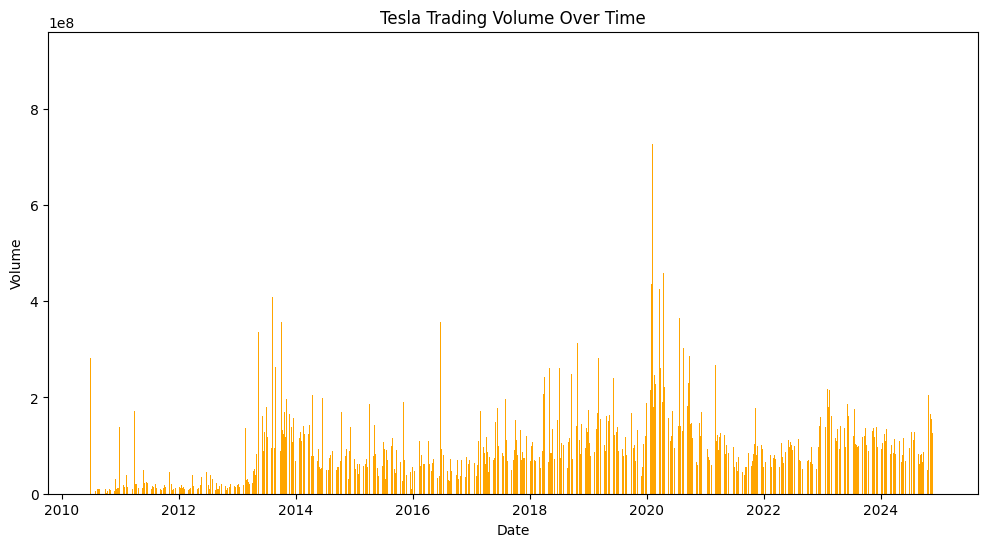

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume'], color='orange')
plt.title("Tesla Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

In [20]:
# 50-day simple moving average
df['SMA_50'] = df['Close'].rolling(window=50).mean()
# 200-day simple moving average
df['SMA_200'] = df['Close'].rolling(window=200).mean()

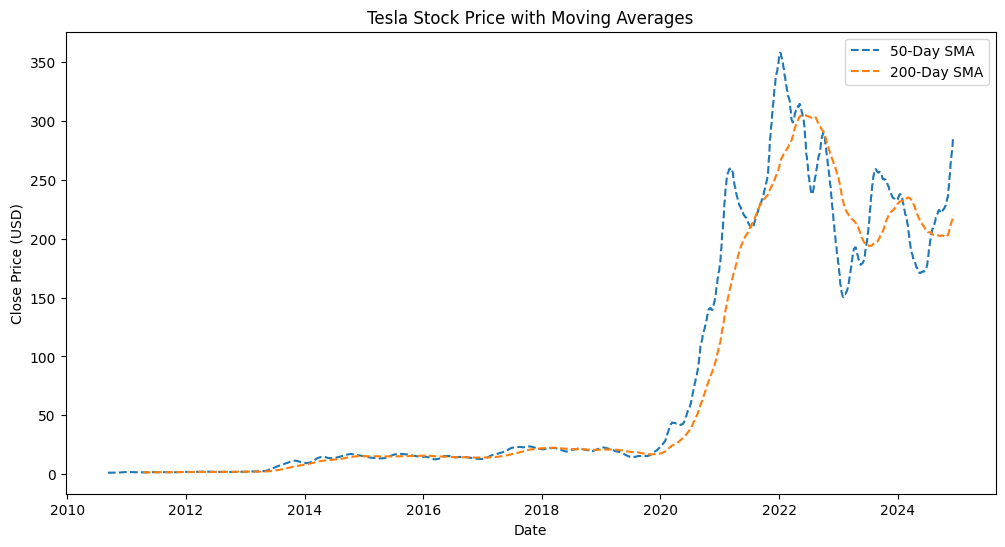

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SMA_50'], label="50-Day SMA", linestyle="--")
plt.plot(df['Date'], df['SMA_200'], label="200-Day SMA", linestyle="--")
plt.title("Tesla Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

In [33]:
df['Daily Change %'] = (df['Close'] - df['Open']) / df['Open'] * 100

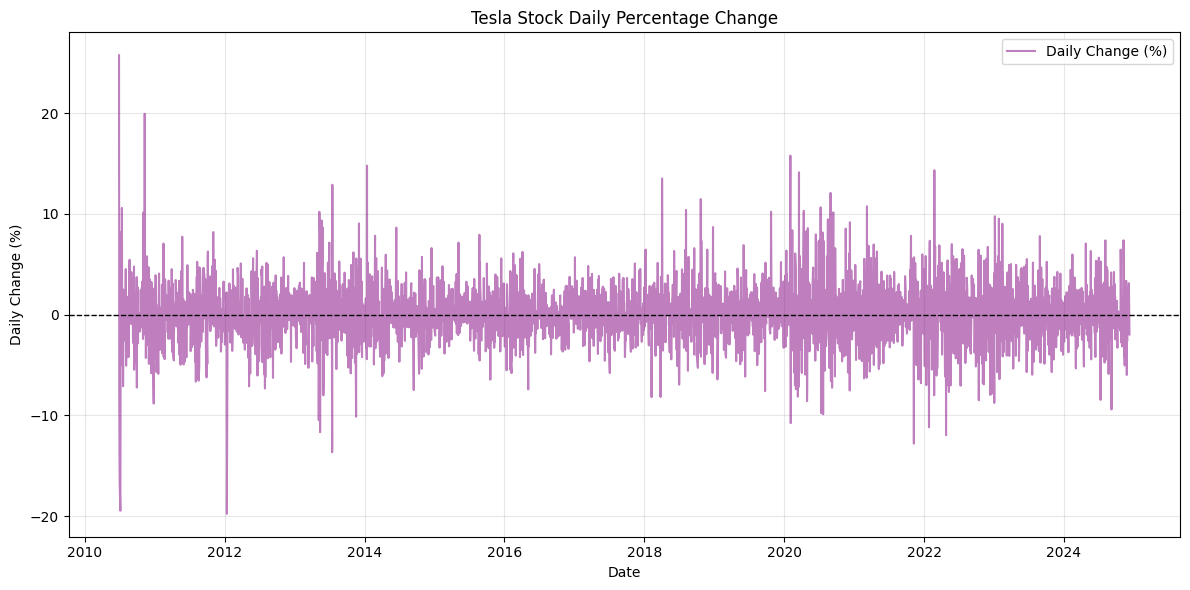

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily Change %'], label="Daily Change (%)", color='purple', alpha=0.5)
plt.title("Tesla Stock Daily Percentage Change")
plt.xlabel("Date")
plt.ylabel("Daily Change (%)")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.grid(alpha=0.3)  # Add grid for readability
plt.legend()  # Add legend
plt.tight_layout()  # Adjust layout to fit elements
plt.show()

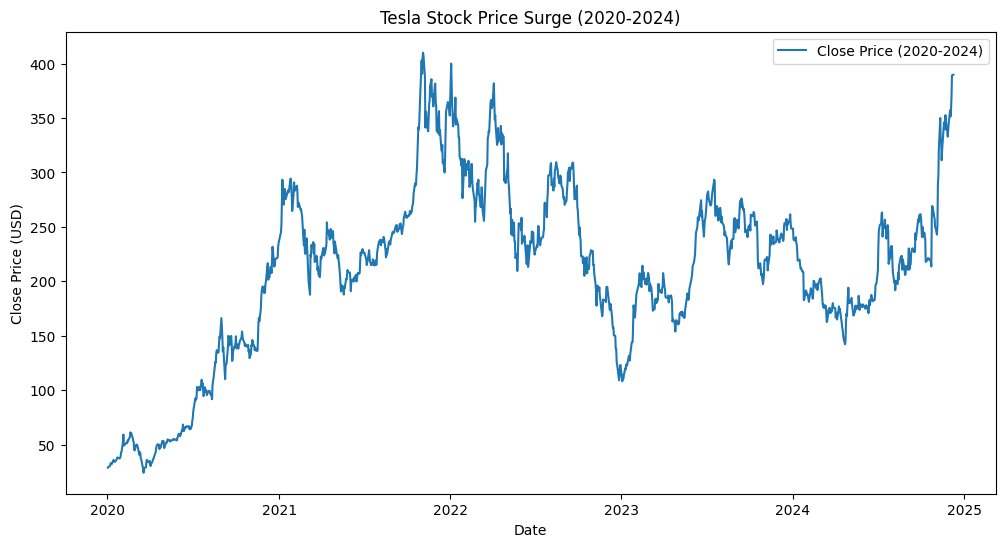

In [32]:
recent_data = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2024-12-31')]
plt.figure(figsize=(12, 6))
plt.plot(recent_data['Date'], recent_data['Close'], label="Close Price (2020-2024)")
plt.title("Tesla Stock Price Surge (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

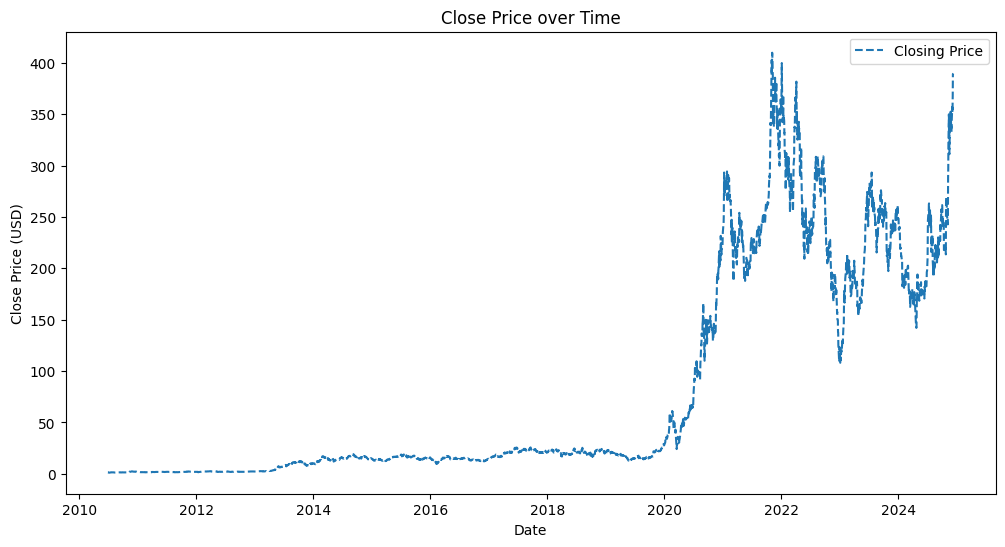

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label="Closing Price", linestyle="--")
plt.title("Close Price over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.show()

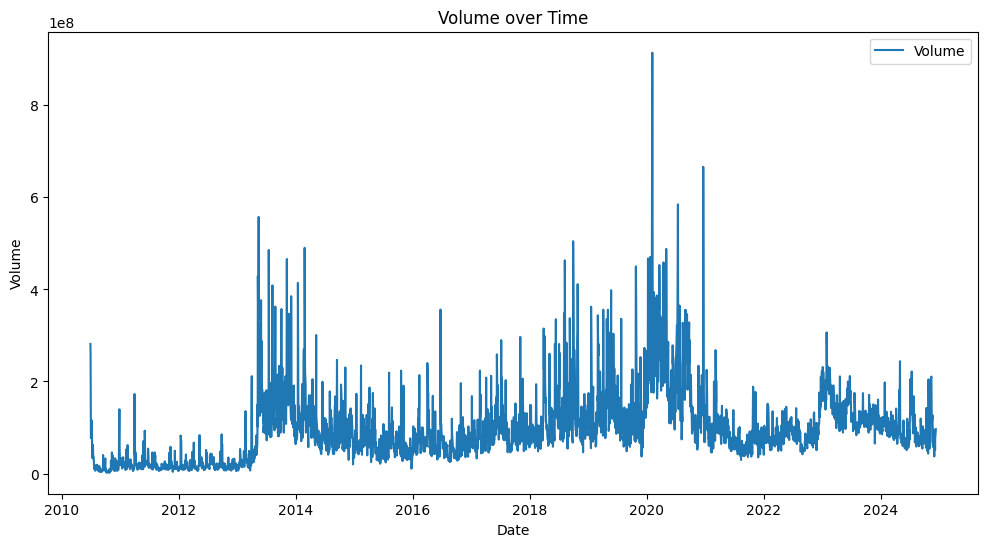

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label="Volume")
plt.title("Volume over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

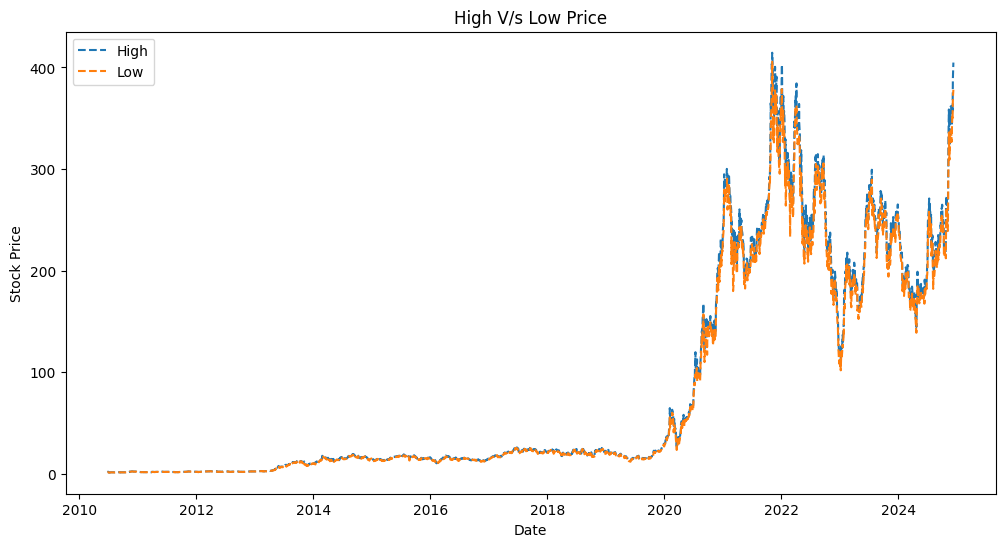

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], label="High", linestyle="--")
plt.plot(df['Date'], df['Low'], label="Low", linestyle="--")
plt.title("High V/s Low Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [33]:
df.to_csv('cleaned_data.csv', index=False)